In [51]:
import pandas as pd 
import numpy as np 



In [52]:
df=pd.read_csv("Churn_Modelling.csv")

In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [57]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [58]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [59]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [60]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.fit_transform(X_test)

In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model=Sequential()
model.add(Dense(11, activation='sigmoid' , input_dim = 11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: 0.5184 - accuracy: 0.7958 - val_loss: 0.5019 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5043 - accuracy: 0.7958 - val_loss: 0.5002 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5029 - accuracy: 0.7958 - val_loss: 0.4996 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5023 - accuracy: 0.7958 - val_loss: 0.4985 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5016 - accuracy: 0.7958 - val_loss: 0.4973 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5009 - accuracy: 0.7958 - val_loss: 0.4967 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.7958 - val_loss: 0.4966 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4952 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4990 - accuracy: 0.7958 - val_loss: 0.4951 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7958 - val_loss: 0.4950 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4988 - accuracy: 0.7958 - val_loss: 0.4953 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 1s 6ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy:

In [68]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [69]:
y_pred

array([[0.2369551 ],
       [0.2369551 ],
       [0.2369551 ],
       ...,
       [0.2369551 ],
       [0.25108153],
       [0.2369551 ]], dtype=float32)

In [70]:
y_pred = y_pred.argmax(axis=-1)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

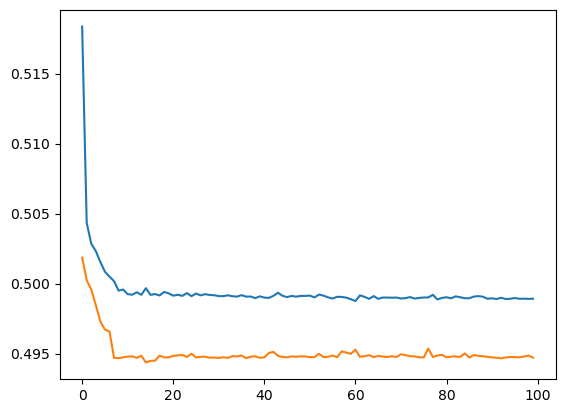

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

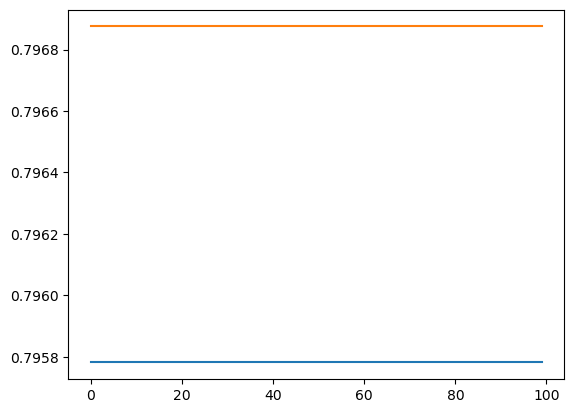

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])